#  Images: rows, columns and all that jazzy mess....

Two dimensional data arrays are normally stored in column-major or row-major order. In row-major order adjacent elements in a row are stored next to each other in memory. In column-major order adjacent elements in a column are stored next to each other in memory. See also https://en.wikipedia.org/wiki/Matrix_representation


For the usual mathematical matrix notation $A_{ij}$, where $i$ is the row, and $j$ the column, we have in the case of a $3x4$ matrix:
$$
A = \begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14}\\
a_{21} & a_{22} & a_{23} & a_{24}\\
a_{31} & a_{32} & a_{33} & a_{34}\\
\end{bmatrix}
$$
Classic languages such as Fortran store their arrays in so-called column-major order. **FDATA(NR,NC)**, and indices started at 1 with the first versions.
More modern language, such a C, store their arrays in row-major order,  **CDATA[NR][NC]**, with indices starting at 0.
```
    col major:   fdata(1,1),  fdata(2,1), ...        first index runs fastest 
    row major:   cdata[0][0], cdata[0][1], ...       last index runs fastest  
```
Examples of column major are: Fortran, [FITS], MatLab, IDL, R, Julia

Examples of row major are: C, Python, (java)

Images are often referred to in X and Y coordinates, like a mathematical system. The origin would be at (0,0) in the lower left corner. Image processing software normally puts the (0,0) origin at the top left corner, which corresponds a bit how the matrix above is printed. This, together with row-major and column-major can make it challenging to interchange data and plot them on the screen.

Add to this that for very large data, re-ordering axes can be a very expensive operation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
# import pyfits as fits               # deprecated
from astropy.io import fits         

Get the Header-Data-Units (hdu's) from a fits file. This particular one only has 1.

In [2]:
hdu = fits.open('../data/cube432.fits')
print(len(hdu))

1


In [3]:
h = hdu[0].header
d = hdu[0].data

print(d.shape)
print(d)

(2, 3, 4)
[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]


This 4x3x2 matrix can actually also be generated from scratch using basic numpy:

In [4]:
d1 = np.zeros(2*3*4).reshape(2,3,4)
for z in range(2):
    for y in range(3):
        for x in range(4):
            d1[z,y,x] = x + 10*y + 100*z
print(d1)

[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]


In [5]:
print(d1.flatten())

[   0.    1.    2.    3.   10.   11.   12.   13.   20.   21.   22.   23.
  100.  101.  102.  103.  110.  111.  112.  113.  120.  121.  122.  123.]


In [6]:
# are two arrays the same (or close enough?)
np.allclose(d,d1)

True

We now want to take a plane from this cube, and plot this in a heatmap or contour map. We are now faced deciding how columns and rows translate to X and Y on a plot. Math, Astronomy, Geography and Image Processing groups all differ a bit how they prefer to see this, so numpy comes  with a number of tools to help you with this:

* np.reshape
* np.transpose (or T)
* np.flipud
* np.fliprd
* np.rot90
* np.swapaxes
* np.moveaxis

the important thing to realize is that they all give a new **view** of the array, which often is more efficient as moving the actual values.

[[ 20.  21.  22.  23.]
 [ 10.  11.  12.  13.]
 [  0.   1.   2.   3.]]


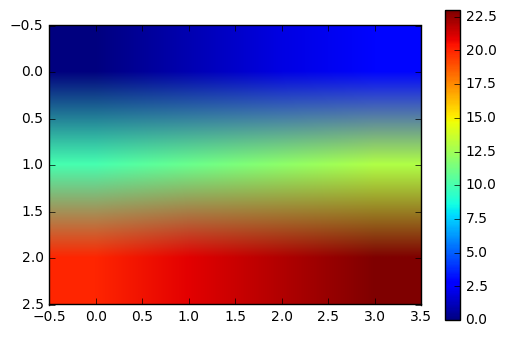

In [7]:
p0 = d[0,:,:]
p1 = d[1,:,:]
print(np.flipud(p0))
plt.imshow(p0)
plt.colorbar()

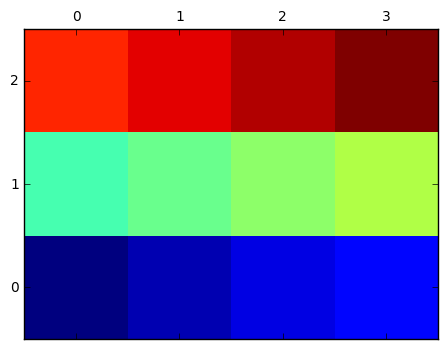

In [8]:
plt.matshow(p0,origin='lower')

Note that for a small 4x3 matrix this image has been artificially made smooth by interpolating in imshow(); however you can already see that the integer coordinates are at the center of a cell:  (0.0) is the center of the lower left cell. This is a little more when you turn off interpolation:


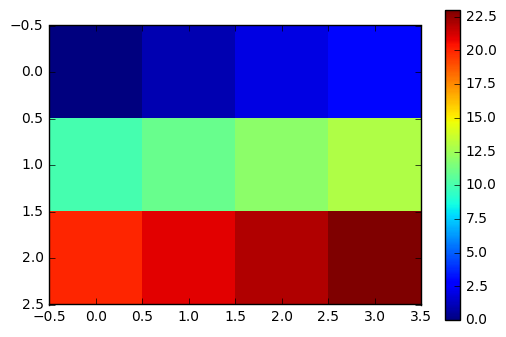

In [9]:
plt.imshow(p0,interpolation='none')
plt.colorbar()

if you want to print the array values on the terminal with 0 at the bottom left, use the np.flipup() function:

[[ 20.  21.  22.  23.]
 [ 10.  11.  12.  13.]
 [  0.   1.   2.   3.]]


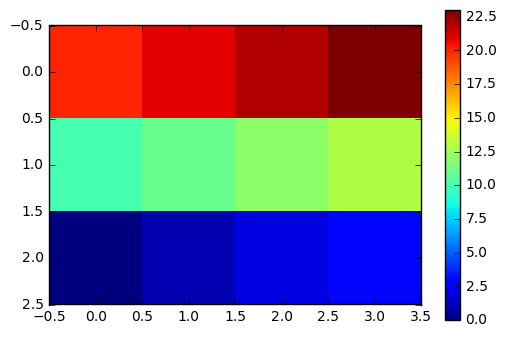

In [10]:
print(np.flipud(p0))
plt.imshow(np.flipud(p0),interpolation='none')
plt.colorbar()

Arrays in numpy are in C-order (row-major) by default, but you can actually change it to Fortran-order (column-major):

In [11]:
d2 = np.arange(3*4).reshape(3,4,order='C')
d3 = np.arange(3*4).reshape(3,4,order='F')
print('C\n',d2)
print('F\n',d3)
d3.transpose()

C
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
F
 [[ 0  3  6  9]
 [ 1  4  7 10]
 [ 2  5  8 11]]


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

## CASA

CASA is a python package used in radio astronomy (ALMA, VLA etc.), but is peculiar in the sense that it caters to astronomers with a fortran background, or mathematicians with a DATA(x,y) expectation: CASA uses column-major arrays with an index starting at 0. CASA images can also store a mask alongside the data, but the logic is the reverse from the masking used in **numpy.ma**: in CASA a True means a good data point, in numpy it means a bad point!

Notebooks don't work within casa (yet), but if you install **casacore** in your local python, the examples below should work. The [kernsuite](http://kernsuite.info/) software should give you one easy option to install casacore, another way is to compile the code directly from https://github.com/casacore/casacore

Hence the example here is shown inline, and not in the notebook form yet. (note CASA currently uses python2)

```
casa

ia.open('../data/cube432.fits')
d1 = ia.getchunk()
d1.shape
 (4,3,2)
d1[3,2,1]
  123.0
  
print d1
[[[   0.  100.]
  [  10.  110.]
  [  20.  120.]]

 [[   1.  101.]
  [  11.  111.]
  [  21.  121.]]

 [[   2.  102.]
  [  12.  112.]
  [  22.  122.]]

 [[   3.  103.]
  [  13.  113.]
  [  23.  123.]]]

p0 = d1[:,:,0]

print p0
[[  0.  10.  20.]
 [  1.  11.  21.]
 [  2.  12.  22.]
 [  3.  13.  23.]]
 
print np.flipud(np.rot90(p0))
[[  0.   1.   2.   3.]
 [ 10.  11.  12.  13.]
 [ 20.  21.  22.  23.]]
 
print np.flipud(np.rot90(p0)).flatten()
[  0.   1.   2.   3.  10.  11.  12.  13.  20.  21.  22.  23.]

# mask boolean in CASA is the opposite of the one in numpy.ma
d1m = ia.getchunk(getmask=True)
print d1[0,0,0],d1m[0,0,0]
0.0 True

# or create the array from scratch
ia.fromshape(shape=[4,3,2])
p2 = ia.getchunk()
p2.shape
 (4,3,2)
etc.etc.

```


## casacore and casacore-python

Using just casacore, you will find the equivalent getchunk() is now called getdata() and converts to a proper numpy array without the need for np.rot90() and np.flipud(). The casacore-python version is able to work in python3 as well.

In [12]:
try:
    import casacore.images.image as image
    print("we have casacore")
    im = image('../data/cube432.fits')
    print(im.shape())           #   ->   [2, 3, 4]
    print(im.datatype())        #   -> 'float'
    d=im.getdata()
    m=im.getmask()
    print(d.shape)              # -> (2,3,4)
    print(d[0,0,0],m[0,0,0])
    """
   [[[[   0.    1.    2.    3.]
      [  10.   11.   12.   13.]
      [  20.   21.   22.   23.]]

     [[ 100.  101.  102.  103.]
      [ 110.  111.  112.  113.]
      [ 120.  121.  122.  123.]]
   """
except:
    print("no casacore")

we have casacore
[2, 3, 4]
float
(2, 3, 4)
0.0 False


In [13]:
import numpy.ma as ma

a = np.arange(4)
am = ma.masked_equal(a,2)
print(a.sum(),am.sum())
print(am.data,am.mask)

6 4
[0 1 2 3] [False False  True False]


### Arrray Transposing

In [14]:
%%time
n = 100
n1 = n
n2 = n+1
n3 = n+2
np.random.seed(123)
a = np.random.normal(size=n1*n2*n3).reshape(n1,n2,n3)
print(len(a.flatten()))
print(a[0,0,0])

1030200
-1.0856306033
CPU times: user 68 ms, sys: 52 ms, total: 120 ms
Wall time: 119 ms


In [15]:
%%time
b = a.transpose()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.4 µs


## Inner and Outer loop order of execution

Set up a (random) square matrix and vector. Multiply the matrix with a vector and measure the performance difference if you order the loops differently.

In [16]:
%%time 
n = 2
m = n+1
np.random.seed(123)
a = np.random.normal(size=m*n).reshape(m,n)
x = np.random.normal(size=n)
print(x[0])
#
#a = np.arange(n*n).reshape(n,n)
#x = np.arange(n)

-2.42667924339
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 349 µs


In [17]:
%%time
b = np.matmul(a,x)
print(a.shape,x.shape,b.shape)

(3, 2) (2,) (3,)
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 562 µs


In [18]:
%%time
b1 = np.zeros(m)
for i in range(m):
    for j in range(n):
        b1[i] = b1[i] + a[i,j]*x[j]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 34.6 µs


In [19]:
%%time
b2 = np.zeros(m)
for i in range(m):
    ai = a[i,:]
    b2[i] = np.inner(ai,x)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 157 µs


In [20]:
%%time
b3 = np.zeros(m)
for j in range(n):
    for i in range(m):
        b3[i] = b3[i] + a[i,j]*x[j]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 33.1 µs


In [21]:
if n < 3:
    print('a',a,'\nx',x)
    print('b',b,'\nb1',b1,'\nb2',b2,'\nb3',b3)
else:
    print(n)

a [[-1.0856306   0.99734545]
 [ 0.2829785  -1.50629471]
 [-0.57860025  1.65143654]] 
x [-2.42667924 -0.42891263]
b [ 2.20670319 -0.04062922  0.69575524] 
b1 [ 2.20670319 -0.04062922  0.69575524] 
b2 [ 2.20670319 -0.04062922  0.69575524] 
b3 [ 2.20670319 -0.04062922  0.69575524]


### Matrix Inversion

In [22]:
from numpy.linalg import inv


In [23]:
n = 2
a1 = np.random.normal(size=n*n).reshape(n,n)

In [24]:
%%time
ainv = inv(a1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 126 µs


In [25]:
print(a1)
print(ainv)

[[ 1.26593626 -0.8667404 ]
 [-0.67888615 -0.09470897]]
[[ 0.13371051 -1.22366764]
 [-0.95845424 -1.78725399]]


In [26]:
i1=np.matmul(a1,ainv)

In [27]:
i0=np.eye(n)

In [28]:
print(np.allclose(i0,i1,atol=1e-10))
print(i1)

True
[[  1.00000000e+00   0.00000000e+00]
 [  2.77555756e-17   1.00000000e+00]]


The last execution should be ** In[28]**